## Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_durations(df, bar_chart = False):
    result = np.zeros([4,15])
    df["valid_ride_duration"] = df["ride_duration"]*(df.ride_reward >0)
    df = df[["current_date","wait_duration","ride_duration","travel_duration","valid_ride_duration"]].groupby("current_date").agg("sum")

    if not bar_chart:
        result[0] = df.valid_ride_duration.to_numpy()
        result[1] = df.wait_duration.to_numpy()
        result[2] = df.travel_duration.to_numpy()
        result[3] = df.ride_duration +result[1]+result[2]
    
    else:
        result = np.zeros(3)
        sum_time= df.ride_duration.to_numpy() + df.wait_duration.to_numpy() + df.travel_duration.to_numpy()
        print(sum_time)
        result[0] = (df.ride_duration.to_numpy()/sum_time).sum()
        result[1] = (df.wait_duration.to_numpy()/sum_time).sum()
        result[2] = (df.travel_duration.to_numpy()/sum_time).sum()

    return result

time_dict = {}
for i in ["a2c","dqn","ppo"]:
    df = pd.read_csv("./test_logs/" + i + ".csv")
    time_dict[i] = get_durations(df)

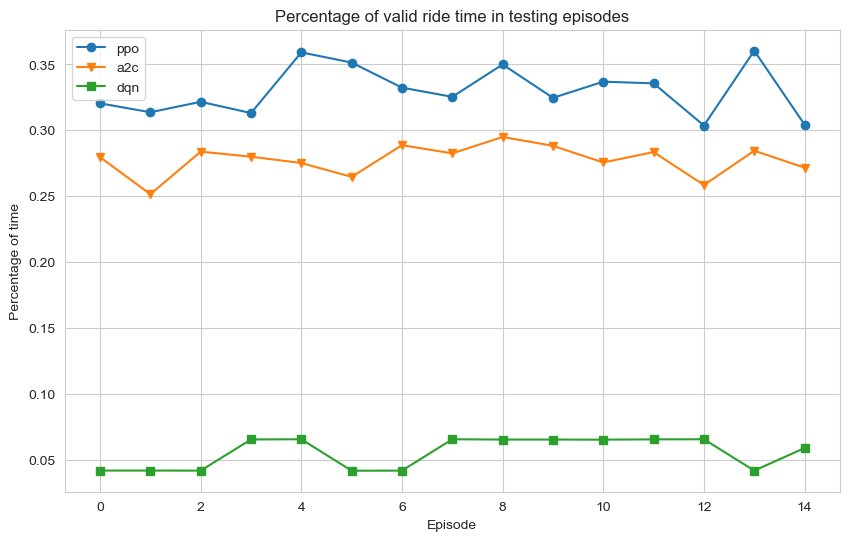

In [4]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.title("Percentage of valid ride time in testing episodes")
plt.plot(np.arange(15),time_dict["ppo"][0]/time_dict["ppo"][3],label = "ppo",marker = "o")
plt.plot(np.arange(15),time_dict["a2c"][0]/time_dict["a2c"][3],label = "a2c",marker = "v")
plt.plot(np.arange(15),time_dict["dqn"][0]/time_dict["dqn"][3],label = "dqn",marker = "s")
plt.xlabel("Episode")
plt.ylabel("Percentage of time")

plt.legend()

In [42]:
time_dict = {}
for i in ["dqn","a2c","ppo"]:
    df = pd.read_csv("./test_logs/" + i + ".csv")
    time_dict[i] = get_durations(df,bar_chart = True)

[840.43333333 840.43333333 841.43333333 842.86666667 840.86666667
 842.93333333 841.43333333 840.86666667 843.86666667 843.86666667
 844.86666667 841.86666667 840.86666667 841.43333333 851.        ]
[866.25       847.93333333 853.58333333 840.2        840.38333333
 840.81666667 852.21666667 861.         851.76666667 847.36666667
 840.81666667 840.4        845.55       883.05       841.28333333]
[855.65       847.11666667 847.95       840.73333333 840.9
 840.13333333 847.6        899.58333333 869.25       847.18333333
 840.65       840.86666667 858.73333333 842.71666667 844.58333333]


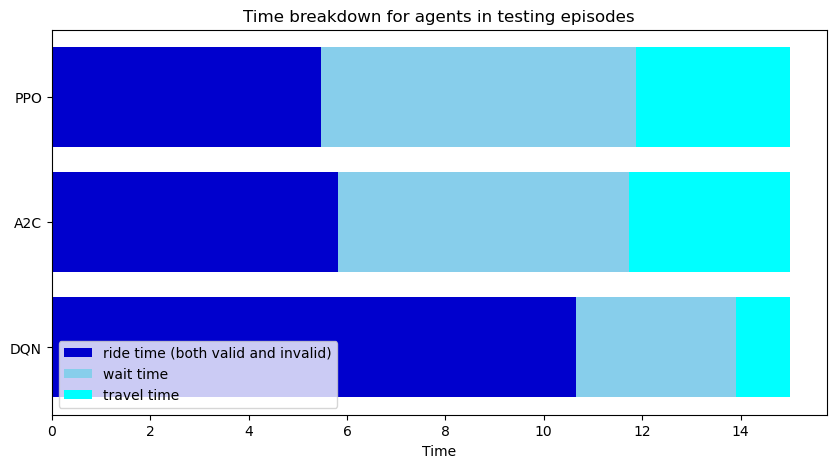

In [61]:
names = ["DQN","A2C","PPO"]
r = [time_dict[key][0] for key in time_dict.keys()]
w = [time_dict[key][1] for key in time_dict.keys()]
t = [time_dict[key][2] for key in time_dict.keys()]

plt.figure(figsize = (10,5))

plt.title("Time breakdown for agents in testing episodes")
plt.barh(names,r,label = "ride time (both valid and invalid)",color = "mediumblue")

plt.barh(names,w,left = r, label = "wait time", color = "skyblue")

plt.barh(names,t,left = np.array(w)+np.array(r),label = "travel time",color = "cyan")
plt.xlabel("Time")
plt.legend()


In [ ]:
df = pd.read_csv("./test_logs/a2c.csv")
df["step_reward"] = df["ride_reward"]-df["travel_reward"]
df[["current_date","step_reward"]].groupby("current_date").agg("sum").step_reward.to_numpy()



def plot_test_reward(arr_reward,agent_name,markermap,linemap):
    sns.set_style("whitegrid")
    
    plt.figure(figsize = (7,9))


    plt.title("Reward for agents in test episodes")
    for i,__ in enumerate(arr_reward):
        plt.plot(np.arange(len(arr_reward[i])),arr_reward[i],\
                 label = agent_name[i],marker = markermap[i],linestyle = linemap[i])
        #plt.axhline(y = np.mean(arr_reward[i]),ls = "dashed")


    plt.xlabel("Days")
    plt.ylabel("Reward")
    plt.ylim([-100,600])
    plt.legend()
    plt.show()


In [ ]:
agent_list = []
name = ["ppo","a2c","dqn","random","greedy"]

#cmap = ["red","green","pink","orange","blue"]
markermap = ["o","v","s","x","x"]
linemap = ["-","-","-",":",":"]

for i in name:
    df = pd.read_csv("./test_logs/"+i+".csv")
    df["step_reward"] = df["ride_reward"]-df["travel_reward"]
    agent_list += [df[["current_date","step_reward"]].groupby("current_date").agg("sum").step_reward.to_numpy()]

plot_test_reward(agent_list,name,markermap,linemap)

In [ ]:
plt.title("Mean reward in test episode")
plt.xlabel("Mean Reward")
plt.barh(name,np.mean(agent_list,axis = 1),color=['purple', 'tab:red', 'green', 'tab:orange', 'tab:blue'][::-1])

## Expected reward for each time

C:\Users\82751\AppData\Local\Temp\ipykernel_11008\254697357.py:16: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  waittime = pd.read_csv(".\disneyenv\disneyenv\envs\data\disneyRideTimes.csv")


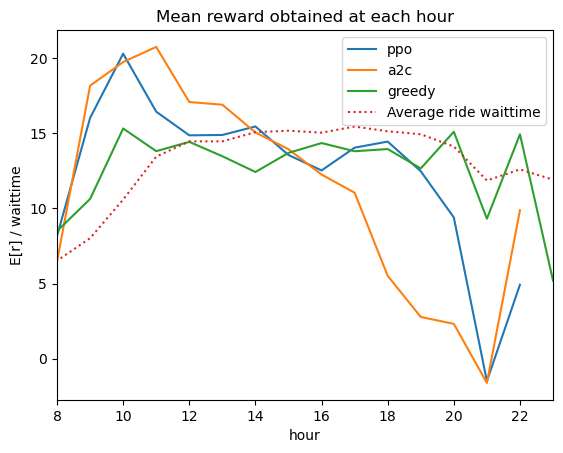

This shows that our agent is making more use of morning time


In [57]:
def get_hour_vs_reward(df):
    df = df.assign(hour = [i.hour for i in pd.to_datetime(df.current_time)])
    df = df.assign(step_reward = df.ride_reward - df.travel_reward)
    tmp = df[["hour","step_reward"]].groupby("hour").agg("mean")
    return tmp

plt.figure()
plt.title("Mean reward obtained at each hour")
plt.ylabel("E[r] / waittime")
plt.xlabel("hour")
for i in ["ppo","a2c","greedy"]:
    df = pd.read_csv("./test_logs/"+i+".csv")
    tmp = get_hour_vs_reward(df)
    plt.plot(tmp.index,tmp.step_reward,label = i)

waittime = pd.read_csv(".\disneyenv\disneyenv\envs\data\disneyRideTimes.csv")
waittime = waittime[waittime.status != "Closed"]
waittime = waittime.fillna(0)
waittime["hour"] = [i.hour for i in pd.to_datetime(waittime.dateTime)]
tmp = waittime.groupby("hour").agg("mean")
plt.plot(tmp.index,tmp.waitMins,linestyle = ":",label = "Average ride waittime")
plt.xlim((8,23))
plt.legend()
plt.show()
print("This shows that our agent is making more use of morning time")

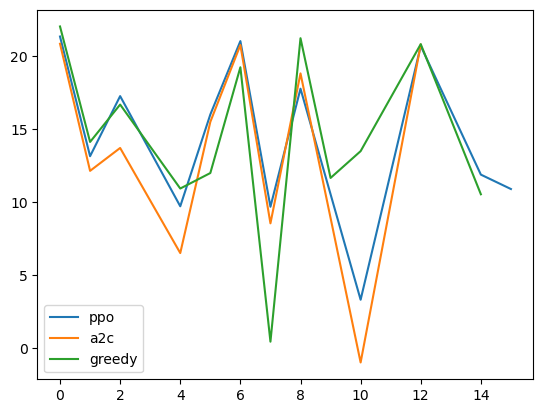

In [40]:
def get_land_vs_reward(df):
    df = df.assign(step_reward = df.ride_reward - df.travel_reward)
    tmp = df[["current_land","step_reward"]].groupby("current_land").agg("mean")
    return tmp
for i in ["ppo","a2c","greedy"]:
    df = pd.read_csv("./test_logs/"+i+".csv")
    tmp = get_land_vs_reward(df)
    plt.plot(tmp.index,tmp.step_reward,label = i)
plt.legend()
plt.show()